# Energy equipartition fitting example: discrete version

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import ascii

In [4]:
import corner

In [5]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [45]:
plt.rcParams["font.family"] = "stix"
plt.rcParams["mathtext.fontset"] = "stix"

In [3]:
import fit_kin_two 
import fit_eta_two
import fit_meq_two

## DATA

In [80]:
DATA = ascii.read('example_data.dat')

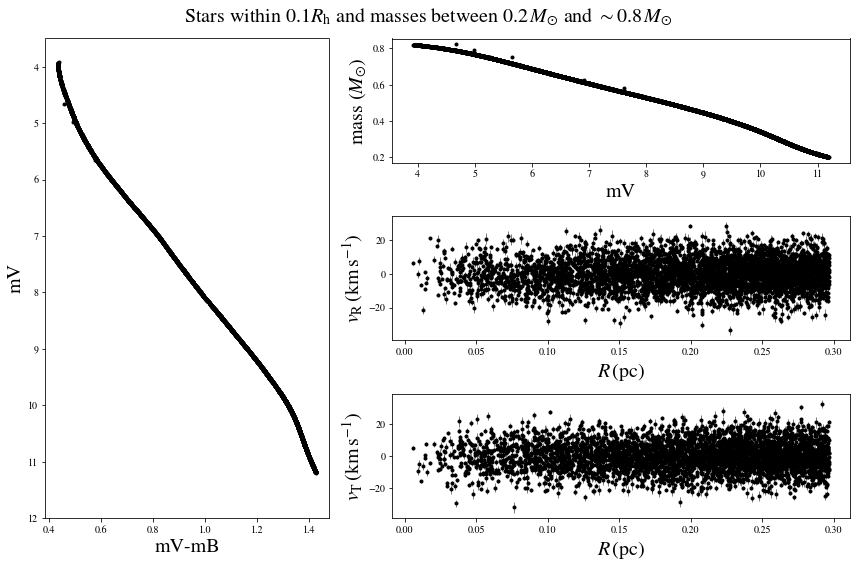

In [90]:
fig = plt.figure(figsize=(12,8))

gsc = fig.add_gridspec(3,5) 

ax_cmd  = fig.add_subplot(gsc[:,:2])
ax_mass = fig.add_subplot(gsc[0,2:])
ax_kin  = [fig.add_subplot(gsc[1,2:]),fig.add_subplot(gsc[2,2:])]

## CMD
ax_cmd.plot(DATA['V-B'],DATA['V'],'.k')
ax_cmd.set_ylim([12,3.5])
ax_cmd.set_xlabel(r'mV-mB',fontsize=20)
ax_cmd.set_ylabel(r'mV',fontsize=20)

## Mass
ax_mass.plot(DATA['V'],DATA['Mass'],'.k')
ax_mass.set_xlabel(r'mV',fontsize=20)
ax_mass.set_ylabel(r'mass ($M_{\odot}$)',fontsize=20)

## Kin
ax_kin[0].errorbar(DATA['R'],DATA['vR'],DATA['err_vR'],fmt='.k',lw=0.5)
ax_kin[0].set_ylabel(r'$v_{\rm R}\,(\rm km\,\rm s^{-1})$',fontsize=20)
ax_kin[0].set_xlabel(r'$R\,(\rm pc)$',fontsize=20)

ax_kin[1].errorbar(DATA['R'],DATA['vT'],DATA['err_vT'],fmt='.k',lw=0.5)
ax_kin[1].set_ylabel(r'$v_{\rm T}\,(\rm km\,\rm s^{-1})$',fontsize=20)
ax_kin[1].set_xlabel(r'$R\,(\rm pc)$',fontsize=20)


###########################
fig.suptitle(r'Stars within $0.1R_{\rm h}$ and masses between $0.2\,M_{\odot}$ and $\sim 0.8\,M_{\odot}$',fontsize=20)
fig.tight_layout()
plt.show()


## Sigma-Mass

In [8]:
mass_bins = np.linspace(np.amin(DATA['Mass']),np.amax(DATA['Mass']),8)

In [9]:
sigma_prf = fit_kin_two.get_prf_tot2D_fixbins(DATA['vR'],DATA['err_vR'],DATA['vT'],DATA['err_vT'],
                                              DATA['V'],DATA['Mass'],mass_bins,n_walkers=100,progress=True)

100%|██████████| 1000/1000 [01:30<00:00, 11.05it/s]


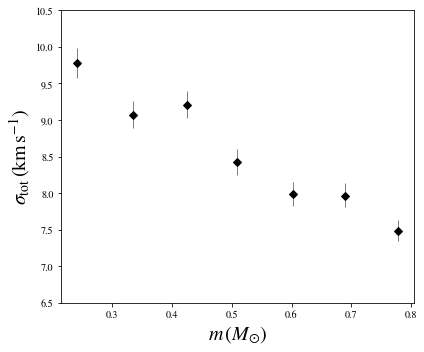

In [73]:
fig,axs = plt.subplots(1,1,figsize=(6,5))


axs.errorbar(sigma_prf[1],sigma_prf[2],yerr=[sigma_prf[3],sigma_prf[4]], fmt='Dk',ms=5,lw=0.5)
    
###################
axs.set_ylim([6.5,10.5])

axs.set_ylabel(r'$\sigma_{\rm tot}\,(\rm km\,\rm s^{-1})$',fontsize=20)
axs.set_xlabel(r'$m\,(M_{\odot})$',fontsize=20)

##################
fig.tight_layout()

plt.show()

## DISCRETE EQUIPARTITION FIT

In [11]:
## assume initial conditions s0~8, mu=0 or nu=0 (no equipartition)

init_guess = np.array([6,0])

### (a) best-fit results

In [12]:
mu_fit = fit_meq_two.get_meq_fit(DATA['vR'],DATA['err_vR'],DATA['vT'],DATA['err_vT'],DATA['Mass'],init_guess,n_burn=800,n_walkers=20,n_steps=1000,progress=True)                                                             

100%|██████████| 1000/1000 [00:40<00:00, 24.72it/s]


In [13]:
eta_fit = fit_eta_two.get_eta_fit(DATA['vR'],DATA['err_vR'],DATA['vT'],DATA['err_vT'],DATA['Mass'],init_guess,n_burn=800,n_walkers=20,n_steps=1000,progress=True)                                                             

100%|██████████| 1000/1000 [00:37<00:00, 26.96it/s]


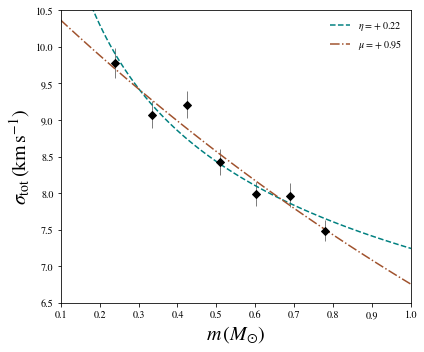

In [72]:
fig,axs = plt.subplots(1,1,figsize=(6,5))

colors = ['teal','sienna']

axs.errorbar(sigma_prf[1],sigma_prf[2],yerr=[sigma_prf[3],sigma_prf[4]], fmt='Dk',ms=5,lw=0.5)

## BEST FIT MODELS
models_mass = np.linspace(0.1,1.0,100)

axs.plot(models_mass,fit_eta_two.model_eta(models_mass,eta_fit[0],eta_fit[3]),'--',c=colors[0],label=r'$\eta=%+5.2lf$'%(eta_fit[3]))
axs.plot(models_mass,fit_meq_two.meq_new(models_mass,mu_fit[0],mu_fit[3]),'-.',c=colors[1],label=r'$\mu =%+5.2lf$'%(mu_fit[3]))
axs.legend(frameon=False)

###################
axs.set_ylim([6.5,10.5])
axs.set_xlim([0.1,1.0])

axs.set_ylabel(r'$\sigma_{\rm tot}\,(\rm km\,\rm s^{-1})$',fontsize=20)
axs.set_xlabel(r'$m\,(M_{\odot})$',fontsize=20)

##################
fig.tight_layout()

plt.show()

### (b) posterior distribution -- Full MCMC chains

In [15]:
mu_chains = fit_meq_two.fit_dis_meq(DATA['vR'],DATA['err_vR'],DATA['vT'],DATA['err_vT'],DATA['Mass'],init_guess,n_walkers=20,n_steps=1000,progress=True)                                                             

100%|██████████| 1000/1000 [00:40<00:00, 24.96it/s]


In [16]:
eta_chains = fit_eta_two.fit_dis_eta(DATA['vR'],DATA['err_vR'],DATA['vT'],DATA['err_vT'],DATA['Mass'],init_guess,n_walkers=20,n_steps=1000,progress=True)                                                             

100%|██████████| 1000/1000 [00:36<00:00, 27.32it/s]


In [20]:
mu_chains[0].shape

(20, 1000, 2)

#### (b.1) chains visualization

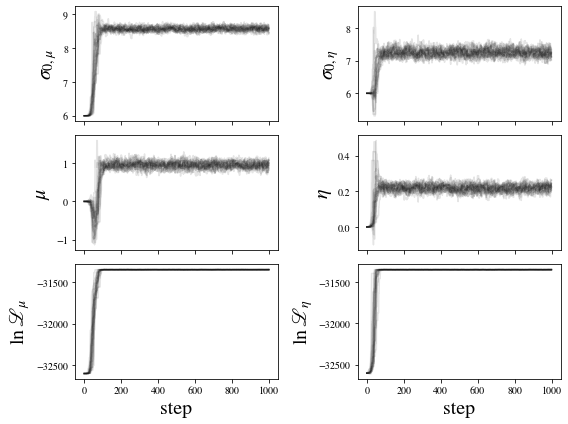

In [57]:
fig,axs = plt.subplots(3,2,figsize=(8,6),sharex=True)

## chain mu
for k in range(mu_chains[0].shape[0]):
    axs[0,0].plot(mu_chains[0][k,:,0],'-k',alpha=0.1)
    axs[1,0].plot(mu_chains[0][k,:,1],'-k',alpha=0.1)
    axs[2,0].plot(mu_chains[1][k,:],'-k',alpha=0.1)


## chain eta
for k in range(eta_chains[0].shape[0]):
    axs[0,1].plot(eta_chains[0][k,:,0],'-k',alpha=0.1)
    axs[1,1].plot(eta_chains[0][k,:,1],'-k',alpha=0.1)
    axs[2,1].plot(eta_chains[1][k,:],'-k',alpha=0.1)

axs[0,0].set_ylabel(r'$\sigma_{0,\mu}$',fontsize=20)
axs[1,0].set_ylabel(r'$\mu$',fontsize=20)
axs[2,0].set_ylabel(r'$\ln \mathscr{L}_{\mu}$',fontsize=20)
axs[2,0].set_xlabel(r'step',fontsize=20)


axs[0,1].set_ylabel(r'$\sigma_{0,\eta}$',fontsize=20)
axs[1,1].set_ylabel(r'$\eta$',fontsize=20)
axs[2,1].set_ylabel(r'$\ln \mathscr{L}_{\eta}$',fontsize=20)
axs[2,1].set_xlabel(r'step',fontsize=20)

#####################################
fig.tight_layout()
plt.show()



#### (b.2) burn out initial steps

In [29]:
## burn
n_burn = 800

mu_samples = mu_chains[0][:,n_burn:,:].reshape((-1,2))
mu_loglike = mu_chains[1][:,n_burn:].reshape((-1))

eta_samples = eta_chains[0][:,n_burn:,:].reshape((-1,2))
eta_loglike = eta_chains[1][:,n_burn:].reshape((-1))



#### (b.3) corner plots

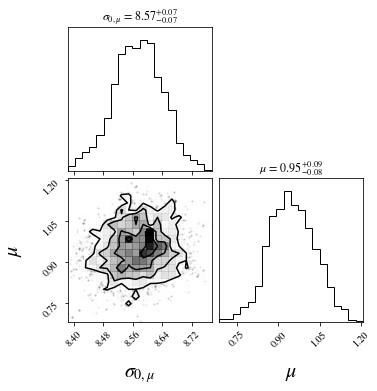

In [63]:
fig_corner_mu = corner.corner(mu_samples,labels=[r'$\sigma_{0,\mu}$',r'$\mu$'],show_titles=True,label_kwargs={"fontsize":20})

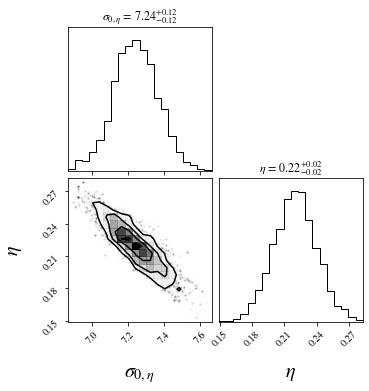

In [64]:
fig_corner_eta = corner.corner(eta_samples,labels=[r'$\sigma_{0,\eta}$',r'$\eta$'],show_titles=True,label_kwargs={"fontsize":20})

#### (b.4) models distributions

In [36]:
n_models = 1000

## set model i=0 as the maximum likelihood one
idx_choice_mu    = np.zeros(n_models+1).astype(int)
idx_choice_mu[0] = np.argmax(mu_loglike)
idx_choice_mu[1:]= np.random.choice(range(mu_samples.shape[0]),size=n_models,replace=False)


idx_choice_eta    = np.zeros(n_models+1).astype(int)
idx_choice_eta[0] = np.argmax(eta_loglike)
idx_choice_eta[1:]= np.random.choice(range(eta_samples.shape[0]),size=n_models,replace=False)


In [37]:
models_mu  = np.zeros((n_models+1,models_mass.size)) 
models_eta = np.zeros((n_models+1,models_mass.size))



for k in range(n_models+1):    
    models_eta[k] = fit_eta_two.model_eta(models_mass,*eta_samples[idx_choice_eta[k]])
    models_mu[k]  = fit_meq_two.meq_new(models_mass,*mu_samples[idx_choice_mu[k]])
    

#### (b.5) final figure including the 90% range of randomly selected models

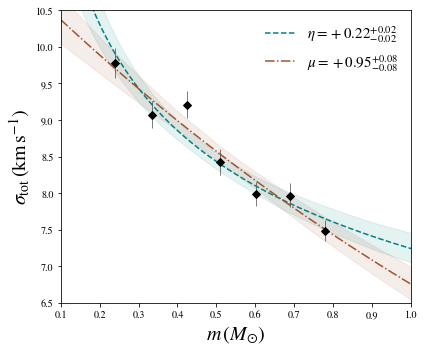

In [71]:
fig,axs = plt.subplots(1,1,figsize=(6,5))

colors = ['teal','sienna']

axs.errorbar(sigma_prf[1],sigma_prf[2],yerr=[sigma_prf[3],sigma_prf[4]], fmt='Dk',ms=5,lw=0.5)

## full mcmc models
axs.plot(models_mass,models_eta[0],'--',c=colors[0],label=r'$\eta=%+5.2lf_{-%5.2lf}^{+%5.2lf}$'%(eta_fit[3],eta_fit[4],eta_fit[5]))

## add 90% range: 5 to 95 percentiles 
axs.fill_between(models_mass,np.percentile(models_eta,5,axis=0),np.percentile(models_eta,95,axis=0),color=colors[0],alpha=0.1)


axs.plot(models_mass,models_mu[0],'-.',c=colors[1],label=r'$\mu =%+5.2lf_{-%5.2lf}^{+%5.2lf}$'%(mu_fit[3],mu_fit[4],mu_fit[5]))

## add 90% range: 5 to 95 percentiles 
axs.fill_between(models_mass,np.percentile(models_mu,5,axis=0),np.percentile(models_mu,95,axis=0),color=colors[1],alpha=0.1)

##
axs.legend(frameon=False,fontsize=15)


###################
axs.set_ylim([6.5,10.5])
axs.set_xlim([0.1,1.0])


axs.set_ylabel(r'$\sigma_{\rm tot}\,(\rm km\,\rm s^{-1})$',fontsize=20)
axs.set_xlabel(r'$m\,(M_{\odot})$',fontsize=20)

##################
fig.tight_layout()

plt.show()